# Example 3: Classification

## Regression formulation

Let's first treat the problem as a regression problem (output dimension = 1, MSE loss).

In [ ]:
import sys
sys.path.append('../../')
from kan import KAN

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import numpy as np
from imblearn.over_sampling import SMOTE
import sympy as sp
from mpmath import mp, mpf

In [ ]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

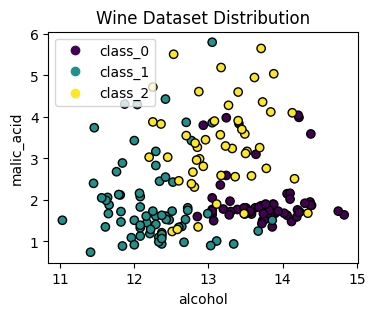

In [ ]:
# Plot the data distribution (using the first two features for visualization)
plt.figure(figsize=(4, 3))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis, edgecolors='k')
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.title('Wine Dataset Distribution')
# Create legend
handles, _ = scatter.legend_elements()
plt.legend(handles, wine.target_names)
plt.show()

In [ ]:
# le = LabelEncoder()
# y = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [ ]:
# y_resampled_encoded = to_categorical(y_resampled)
y_resampled_encoded = y_resampled

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_encoded, test_size=0.3, random_state=40,stratify=y_resampled_encoded)

In [ ]:
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device = 'cpu'
device = 'cuda'

print(device)

cuda


In [ ]:
# dataset = {}
# dataset['train_input'] = torch.from_numpy(X_train).to(device)
# dataset['test_input'] = torch.from_numpy(X_test).to(device)
# dataset['train_label'] = torch.from_numpy(y_train[:,None]).to(device)
# dataset['test_label'] = torch.from_numpy(y_test[:,None]).to(device)

dataset = {}
dataset['train_input'] = torch.from_numpy(X_train).to(device)
dataset['test_input'] = torch.from_numpy(X_test).to(device)
dataset['train_label'] = torch.from_numpy(y_train).long().to(device)
dataset['test_label'] = torch.from_numpy(y_test).long().to(device)

Train KAN

In [ ]:
def check_accuracy(model: KAN, dataset: dict):
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float()), torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())

In [ ]:
print(dataset['test_label'].shape)

torch.Size([64])


In [ ]:
model_check = KAN(width=[13,3,3], grid=3, k=4, device=device)

def train_acc():
    return torch.mean((torch.argmax(model_check(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model_check(dataset['test_input']), dim=1) == dataset['test_label']).float())

results = model_check.train(dataset, opt="LBFGS", steps=200, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss(), lr=0.0002, device=device)
print("Train accuracy:", results['train_acc'][-1], " - Test accuracy:", results['test_acc'][-1])

In [ ]:
print('train_loss:', np.array(results['train_loss']))
print('test_loss:', np.array(results['test_loss']))
print('train_loss:', np.array(results['train_loss']))
print('test_loss:', np.array(results['test_loss']))

train_loss: [6.28737880e-01 2.02084714e-01 6.60387726e-02 2.87270398e-02
 1.24586278e-02 5.93720737e-03 2.01470960e-03 7.81816440e-04
 3.62555734e-04 1.40613382e-04]
test_loss: [0.65121766 0.26143828 0.17081463 0.16215488 0.15915438 0.17028113
 0.16771551 0.16439957 0.16573528 0.1695827 ]
train_loss: [6.28737880e-01 2.02084714e-01 6.60387726e-02 2.87270398e-02
 1.24586278e-02 5.93720737e-03 2.01470960e-03 7.81816440e-04
 3.62555734e-04 1.40613382e-04]
test_loss: [0.65121766 0.26143828 0.17081463 0.16215488 0.15915438 0.17028113
 0.16771551 0.16439957 0.16573528 0.1695827 ]


In [ ]:
# model_98 = KAN(width=[13,4,1], grid=3, k=3)
# model_98.load_ckpt('3_wine_98.ckpt')

In [ ]:
# acc_train, acc_test = check_accuracy(model_98, dataset)
# print("Train accuracy check:", results['train_acc'][-1], " - Test accuracy check:", results['test_acc'][-1])

In [ ]:
print(model_check.width)
print(model_check.grid)
print(model_check.k)

[13, 3, 3]
3
4


Automatic symbolic regression

In [ ]:
lib = ['x','x^2','x^3','1/x','sqrt','1/sqrt(x)','exp','log','abs','sin','tan','tanh','sigmoid','relu','sgn','arcsin','arctan','arctanh','0','gaussian','cosh']
model_check.auto_symbolic(lib=lib)

# model_check.auto_symbolic()
# formula = model_98.symbolic_formula()[0][0]
# formula

fixing (0,0,0) with gaussian, r2=0.9929022401224754
fixing (0,0,1) with gaussian, r2=0.9945695011017219
fixing (0,0,2) with sin, r2=0.9995817517321567
fixing (0,1,0) with gaussian, r2=0.9999765412662647
fixing (0,1,1) with tan, r2=0.9627955026310705
fixing (0,1,2) with sin, r2=0.9919302190096683
fixing (0,2,0) with cosh, r2=0.9334385289929765
fixing (0,2,1) with sin, r2=0.9990307355487617
fixing (0,2,2) with tanh, r2=0.9994962475441995
fixing (0,3,0) with gaussian, r2=0.9984870263125053
fixing (0,3,1) with gaussian, r2=0.9998133882983784
fixing (0,3,2) with gaussian, r2=0.9998771393715837
fixing (0,4,0) with tanh, r2=0.9997697182421088
fixing (0,4,1) with gaussian, r2=0.9967224386651125
fixing (0,4,2) with sin, r2=0.9986389626933971
fixing (0,5,0) with x^2, r2=0.9982619864985114
fixing (0,5,1) with sin, r2=0.999208098489706
fixing (0,5,2) with sin, r2=0.9999041051243858
fixing (0,6,0) with sin, r2=0.9998498968403788
fixing (0,6,1) with tan, r2=0.9990466214142888
fixing (0,6,2) with sin

In [ ]:
formula1, formula2, formula3 = model_check.symbolic_formula()[0]

In [ ]:
print('Formula1:', formula1)
print('Formula2:', formula2)
print('Formula3:', formula3)

Formula1: -0.12*Max(0, -7.65*sin(0.5*x_1 - 3.89) + 56.82*sin(0.54*x_10 - 7.23) + 13.37*sin(0.63*x_13 + 8.0) - 4.74*sin(0.83*x_2 - 1.38) - 20.34*sin(0.3*x_5 - 7.67) + 24.61*sin(0.41*x_6 + 8.42) + 26.0*sin(0.81*x_7 + 9.8) + 12.66*tanh(0.6*x_3 - 0.31) - 81.93 + 63.55*exp(-0.17*(-0.64*x_9 - 1)**2) - 30.62*exp(-0.18*(-0.53*x_4 - 1)**2) + 34.06*exp(-0.59*(-0.47*x_12 - 1)**2) + 43.2*exp(-0.85*(-0.52*x_11 - 1)**2) - 6.91*exp(-3.25*(1 - 0.39*x_8)**2)) + 0.51*Max(0, 15.28*sin(0.57*x_10 + 5.37) - 2.72*sin(1.1*x_11 - 5.63) - 12.65*sin(0.71*x_13 + 9.02) - 8.61*sin(0.49*x_3 + 8.98) + 2.5*sin(1.16*x_6 - 5.39) + 2.54*tan(0.33*x_2 - 6.84) - 4.72*tan(0.17*x_7 + 8.51) + 10.21 + 7.23*exp(-0.13*(-x_9 - 0.94)**2) + 0.32*exp(-3.23*(-x_8 - 0.7)**2) + 24.15*exp(-0.12*(-0.53*x_4 - 1)**2) - 6.62*exp(-0.26*(-x_12 - 0.84)**2) - 13.37*exp(-0.82*(-0.45*x_1 - 1)**2) + 0.67*exp(-0.58*(1 - 0.93*x_5)**2)) + 13.05 - 20.02*exp(-0.9*(0.02*(-x_6 - 0.35)**2 + 0.22*sin(1.07*x_7 + 9.78) - 0.04*tan(0.41*x_10 + 3.19) - 0.03*cosh

In [ ]:
def import_formula_from_txt(path):
    with open(path, 'r') as f:
        import_expr = f.read()
    loaded_expr = sp.sympify(import_expr)
    return loaded_expr

def export_formula_to_txt(formula, path):
    export_expr = sp.srepr(formula)
    with open(path, 'w') as f:
        f.write(export_expr)

In [ ]:
export_formula_to_txt(formula1, './formula1_wine.txt')
export_formula_to_txt(formula2, './formula2_wine.txt')
export_formula_to_txt(formula3, './formula3_wine.txt')

loaded_formula1 = import_formula_from_txt('./formula1_wine.txt')
loaded_formula2 = import_formula_from_txt('./formula2_wine.txt')
loaded_formula3 = import_formula_from_txt('./formula3_wine.txt')

print('Formula1:', loaded_formula1)
print('Formula2:', loaded_formula2)
print('Formula3:', loaded_formula3)

Formula1: -0.12*Max(0, -7.65*sin(0.5*x_1 - 3.89) + 56.82*sin(0.54*x_10 - 7.23) + 13.37*sin(0.63*x_13 + 8.0) - 4.74*sin(0.83*x_2 - 1.38) - 20.34*sin(0.3*x_5 - 7.67) + 24.61*sin(0.41*x_6 + 8.42) + 26.0*sin(0.81*x_7 + 9.8) + 12.66*tanh(0.6*x_3 - 0.31) - 81.93 + 63.55*exp(-0.17*(-0.64*x_9 - 1)**2) - 30.62*exp(-0.18*(-0.53*x_4 - 1)**2) + 34.06*exp(-0.59*(-0.47*x_12 - 1)**2) + 43.2*exp(-0.85*(-0.52*x_11 - 1)**2) - 6.91*exp(-3.25*(1 - 0.39*x_8)**2)) + 0.51*Max(0, 15.28*sin(0.57*x_10 + 5.37) - 2.72*sin(1.1*x_11 - 5.63) - 12.65*sin(0.71*x_13 + 9.02) - 8.61*sin(0.49*x_3 + 8.98) + 2.5*sin(1.16*x_6 - 5.39) + 2.54*tan(0.33*x_2 - 6.84) - 4.72*tan(0.17*x_7 + 8.51) + 10.21 + 7.23*exp(-0.13*(-x_9 - 0.94)**2) + 0.32*exp(-3.23*(-x_8 - 0.7)**2) + 24.15*exp(-0.12*(-0.53*x_4 - 1)**2) - 6.62*exp(-0.26*(-x_12 - 0.84)**2) - 13.37*exp(-0.82*(-0.45*x_1 - 1)**2) + 0.67*exp(-0.58*(1 - 0.93*x_5)**2)) + 13.05 - 20.02*exp(-0.9*(0.02*(-x_6 - 0.35)**2 + 0.22*sin(1.07*x_7 + 9.78) - 0.04*tan(0.41*x_10 + 3.19) - 0.03*cosh

In [ ]:
variables = loaded_formula1.free_symbols
print("Variables in the expression:", variables)

Variables in the expression: {x_13, x_10, x_1, x_12, x_7, x_6, x_8, x_4, x_2, x_11, x_9, x_5, x_3}


How accurate is this formula?

In [ ]:
def acc_new(f_sympy_1, f_sympy_2, f_sympy_3, X, y):
    batch = X.shape[0]
    correct = 0
    res = []

    x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13 = sp.symbols('x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13')

    f_math_1 = sp.lambdify((x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13), f_sympy_1, modules=['mpmath'])
    f_math_2 = sp.lambdify((x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13), f_sympy_2, modules=['mpmath'])
    f_math_3 = sp.lambdify((x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13), f_sympy_3, modules=['mpmath'])

    mp.dps = 30

    for i in range(batch):
        # if(i%100 == 0):
        #     print("==========", i, " ==========")

        logit1 = f_math_1(mpf(str(X[i,0].item())), mpf(str(X[i,1].item())), mpf(str(X[i,2].item())), mpf(str(X[i,3].item())), mpf(str(X[i,4].item())), mpf(str(X[i,5].item())), mpf(str(X[i,6].item())), mpf(str(X[i,7].item())), mpf(str(X[i,8].item())), mpf(str(X[i,9].item())), mpf(str(X[i,10].item())), mpf(str(X[i,11].item())), mpf(str(X[i,12].item())))
        logit2 = f_math_2(mpf(str(X[i,0].item())), mpf(str(X[i,1].item())), mpf(str(X[i,2].item())), mpf(str(X[i,3].item())), mpf(str(X[i,4].item())), mpf(str(X[i,5].item())), mpf(str(X[i,6].item())), mpf(str(X[i,7].item())), mpf(str(X[i,8].item())), mpf(str(X[i,9].item())), mpf(str(X[i,10].item())), mpf(str(X[i,11].item())), mpf(str(X[i,12].item())))
        logit3 = f_math_3(mpf(str(X[i,0].item())), mpf(str(X[i,1].item())), mpf(str(X[i,2].item())), mpf(str(X[i,3].item())), mpf(str(X[i,4].item())), mpf(str(X[i,5].item())), mpf(str(X[i,6].item())), mpf(str(X[i,7].item())), mpf(str(X[i,8].item())), mpf(str(X[i,9].item())), mpf(str(X[i,10].item())), mpf(str(X[i,11].item())), mpf(str(X[i,12].item())))

        res.append(np.array([logit1, logit2, logit3]))
        correct += np.argmax([logit1, logit2, logit3]) == y[i]

    return correct/batch, res

In [ ]:
acc, res = acc_new(loaded_formula1, loaded_formula2, loaded_formula3, dataset['test_input'], dataset['test_label'])

print('Test acc of the formula:', acc)

Test acc of the formula: tensor(0.9844, device='cuda:0')
